In [10]:
import pandas as pd

# Specify the file path
file_path = 'C:\\Users\\tanxe\\Programming\\ML\\WORK\\classifier\\data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop(columns=['source_id', 'author', 'published_at', 'url_to_image', 'url' ])
filtered_df = df
filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'Stock' or x == 'Finance' else 0)
df_cleaned = filtered_df.dropna(subset=['content'])
balanced_df = df_cleaned
balanced_df

# filtered_df = df[df['source_name'].isin(['GlobeNewswire', 'The Times of India'])]

# filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)
# df_cleaned = filtered_df.dropna(subset=['full_content'])
# df_relevant_zero = df_cleaned[df_cleaned['relevant'] == 0]
# df_relevant_one = df_cleaned[df_cleaned['relevant'] == 1]
# df_sampled = df_relevant_zero.sample(n=1400, random_state=42)
# balanced_df = pd.concat([df_sampled, df_relevant_one], ignore_index=True)

,article_id,source_name,title,description,content,category,full_content,relevant
0,89541,International Business Times,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...,0
1,89542,Prtimes.jp,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN,0
2,89543,VOA News,UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN,0
3,89545,The Indian Express,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,0
4,89547,The Times of Israel,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...","Scores of foreign citizens were killed, taken ...",Nepal,NaN,0
...,...,...,...,...,...,...,...,...
105370,781108,The Indian Express,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,0
105371,781129,Forbes,FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,0
105372,781235,NPR,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,0
105373,781240,Forbes,Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,0


In [11]:
balanced_df_24k = balanced_df[balanced_df['source_name'].isin(["ETF Daily News", "The Times of India"])]
balanced_df_24k['relevant'] = balanced_df_24k['category'].apply(lambda x: 1 if x == 'Stock' else 0)
balanced_df_24k = balanced_df_24k.dropna(subset=['content'])
balanced_df_24k['relevant'].value_counts()

C:\Users\tanxe\AppData\Local\Temp\ipykernel_3520\2424080986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df_24k['relevant'] = balanced_df_24k['category'].apply(lambda x: 1 if x == 'Stock' else 0)


relevant
0    20757
1     3503
Name: count, dtype: int64

In [12]:
balanced_df_24k[balanced_df_24k['relevant'] == 1]

,article_id,source_name,title,description,content,category,full_content,relevant
3109,94343,The Times of India,These 9 commodity stocks hit 52-week high on T...,"During Thursday's trading session, the Sensex ...","Nov 02, 2023, 07:22:41 PM IST\nDuring Thursday...",Stock,NaN,1
57910,133924,The Times of India,Fundamental Radar: Varun Beverages poised to b...,Varun Beverages Ltd is the second-largest fran...,SynopsisVarun Beverages Ltd is the second-larg...,Stock,NaN,1
57935,134021,The Times of India,Stock market update: Mining stocks up as marke...,The 30-share BSE Sensex was up 425.32 points...,NEW DELHI: Mining stocks were trading higher o...,Stock,Getty Images Nifty moved in a tight range of 8...,1
57936,134022,The Times of India,Stock market update: Fertilisers stocks up as ...,The 30-share BSE Sensex was up 441.31 points...,NEW DELHI: Fertilisers stocks were trading hig...,Stock,Getty Images NEW DELHI: Fertilisers stocks wer...,1
57937,134023,The Times of India,InterGlobe stock price up 0.08 per cent as Sen...,"As of 30-Sep-2023, promoters held 38.02 per ce...",Shares of InterGlobe Aviation Ltd. rose 0.08 p...,Stock,"Reuters On an immediate basis, 15,770/52,500 a...",1
...,...,...,...,...,...,...,...,...
102076,693939,ETF Daily News,Universal (NYSE:UVV) vs. British American Toba...,Universal (NYSE:UVV – Get Free Report) and Bri...,Universal (NYSE:UVV – Get Free Report) and Bri...,Stock,Universal (NYSE:UVV–Get Free Report) and Briti...,1
102077,693944,The Times of India,Do we have enough retail money in debt markets?,"​​For example, as per the monthly data release...","Generally, the retail investors are late to th...",Stock,IANS INSIGHTS \n \t Rea...,1
102078,693947,The Times of India,"FII action, OPEC+ meet among top 10 factors to...",Meena expects the market to experience some di...,Indian frontline indices S&amp;P BSE Sensex an...,Stock,ETMarkets.com Indian frontline indices S&P BSE...,1
102079,693954,The Times of India,"For workers at this iPhone plant, Tata means a...","At the Narasapura facility, the recent takeove...","It is the Tata tag we aim for, who doesnt want...",Stock,"“It is the Tata tag we aim for, who doesn’t ...",1


In [13]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(balanced_df_24k, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

train_df['relevant'].value_counts()

relevant
0    12450
1     2106
Name: count, dtype: int64

In [14]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Weighted XLNet

In [16]:
print(torch.cuda.is_available())  # This should return True if CUDA is available 

True


In [17]:
# %pip install transformers torch

In [19]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import XLNetForSequenceClassification


# Load the tokenizer and model
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        encoding = self.tokenizer(
            row['content'], # Replace 'content' with 'article_content' if working with real data
            truncation=True, 
            padding='max_length', 
            max_length=self.max_length, 
            return_tensors='pt' #  return the output in the form of PyTorch tensors
            )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(row['relevant'], dtype=torch.float), # for BCEWithLogitsLoss use float
        }

train_dataset = TextDataset(train_df, tokenizer, max_length=128)
val_dataset = TextDataset(val_df, tokenizer, max_length=128)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['relevant']), y=train_df['relevant'])
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# load the XLNet model
XLNet_model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=1)
XLNet_model.to(device)

# load from checkpoint
checkpoint = torch.load('best_XLNet_model_epoch_3_BCEWithLogitsLoss.pt')
XLNet_model.load_state_dict(checkpoint['model_state_dict'])

# Loss function and optimizer
# loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor)
optimizer = AdamW(XLNet_model.parameters(), lr=2e-5)

# Training loop
num_epochs = 20
current_epoch = 5
best_val_loss = float('inf')

for epoch in range(current_epoch, num_epochs):
    print(f"Epoch {epoch}/{num_epochs}")
    XLNet_model.train() #switch to training mode
    train_loss = 0
    for batch_idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad() # Clear old gradients
        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device),
            'labels': batch['labels'].to(device),
        }

        outputs = XLNet_model(**inputs)
        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_dataloader) - 1:
            print(f"  Batch {batch_idx + 1}/{len(train_dataloader)} - Loss: {loss.item():.4f}")

    train_loss /= len(train_dataloader) # average training loss
    print(f"Training Loss: {train_loss:.4f}")

    # Validation
    XLNet_model.eval()
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }
            outputs = XLNet_model(**inputs)
            val_loss += outputs.loss.item()
            logits = outputs.logits
            preds = torch.sigmoid(logits).cpu().numpy() > 0.5  # threshold = 0.5 for  now
            val_preds.extend(preds)           
            val_labels.extend(inputs['labels'].cpu().numpy())
            
    val_loss /= len(val_dataloader) # average validation loss
    print(f"Validation Loss: {val_loss:.4f}")
    print(classification_report(val_labels, val_preds))

    # Save the best model
    if val_loss < best_val_loss:
        print(f"Validation loss improved. Saving model.")
        best_val_loss = val_loss
        torch.save({
        'epoch': epoch,
        'model_state_dict': XLNet_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': best_val_loss
    }, f"best_XLNet_model_epoch_{epoch}_BCEWithLogitsLoss.pt")

print("Training complete!")

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 5/20
  Batch 10/910 - Loss: 0.0471
  Batch 20/910 - Loss: 0.0953
  Batch 30/910 - Loss: 0.0498
  Batch 40/910 - Loss: 0.1012
  Batch 50/910 - Loss: 0.0361
  Batch 60/910 - Loss: 0.0351
  Batch 70/910 - Loss: 0.1042
  Batch 80/910 - Loss: 0.1007
  Batch 90/910 - Loss: 0.0428
  Batch 100/910 - Loss: 0.0481
  Batch 110/910 - Loss: 0.0825
  Batch 120/910 - Loss: 0.0665
  Batch 130/910 - Loss: 0.0428
  Batch 140/910 - Loss: 0.0936
  Batch 150/910 - Loss: 0.0943
  Batch 160/910 - Loss: 0.1505
  Batch 170/910 - Loss: 0.0314
  Batch 180/910 - Loss: 0.0834
  Batch 190/910 - Loss: 0.1200
  Batch 200/910 - Loss: 0.1305
  Batch 210/910 - Loss: 0.1035
  Batch 220/910 - Loss: 0.0661
  Batch 230/910 - Loss: 0.1401
  Batch 240/910 - Loss: 0.1590
  Batch 250/910 - Loss: 0.1222
  Batch 260/910 - Loss: 0.1267
  Batch 270/910 - Loss: 0.0265
  Batch 280/910 - Loss: 0.1443
  Batch 290/910 - Loss: 0.0056
  Batch 300/910 - Loss: 0.0501
  Batch 310/910 - Loss: 0.0660
  Batch 320/910 - Loss: 0.0790
  Batc

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

  Batch 10/910 - Loss: 0.0591
  Batch 20/910 - Loss: 0.0935
  Batch 30/910 - Loss: 0.1602
  Batch 40/910 - Loss: 0.0592
  Batch 50/910 - Loss: 0.0621
  Batch 60/910 - Loss: 0.0139
  Batch 70/910 - Loss: 0.0769
  Batch 80/910 - Loss: 0.0094
  Batch 90/910 - Loss: 0.0017
  Batch 100/910 - Loss: 0.0046
  Batch 110/910 - Loss: 0.0743
  Batch 120/910 - Loss: 0.0607
  Batch 130/910 - Loss: 0.0547
  Batch 140/910 - Loss: 0.0504
  Batch 150/910 - Loss: 0.0622
  Batch 160/910 - Loss: 0.0843
  Batch 170/910 - Loss: 0.0137
  Batch 180/910 - Loss: 0.0221
  Batch 190/910 - Loss: 0.0881
  Batch 200/910 - Loss: 0.0133
  Batch 210/910 - Loss: 0.0622
  Batch 220/910 - Loss: 0.0872
  Batch 230/910 - Loss: 0.0921
  Batch 240/910 - Loss: 0.0343
  Batch 250/910 - Loss: 0.0036
  Batch 260/910 - Loss: 0.0623
  Batch 270/910 - Loss: 0.0607
  Batch 280/910 - Loss: 0.0047
  Batch 290/910 - Loss: 0.0095
  Batch 300/910 - Loss: 0.0349
  Batch 310/910 - Loss: 0.0589
  Batch 320/910 - Loss: 0.2337
  Batch 330/910 -

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

  Batch 10/910 - Loss: 0.0853
  Batch 20/910 - Loss: 0.0273
  Batch 30/910 - Loss: 0.0489
  Batch 40/910 - Loss: 0.0258
  Batch 50/910 - Loss: 0.0644
  Batch 60/910 - Loss: 0.0073
  Batch 70/910 - Loss: 0.1230
  Batch 80/910 - Loss: 0.0025
  Batch 90/910 - Loss: 0.1065
  Batch 100/910 - Loss: 0.0696
  Batch 110/910 - Loss: 0.1039
  Batch 120/910 - Loss: 0.0122
  Batch 130/910 - Loss: 0.0770
  Batch 140/910 - Loss: 0.0402
  Batch 150/910 - Loss: 0.0039
  Batch 160/910 - Loss: 0.0431
  Batch 170/910 - Loss: 0.0256
  Batch 180/910 - Loss: 0.1849
  Batch 190/910 - Loss: 0.0729
  Batch 200/910 - Loss: 0.0601
  Batch 210/910 - Loss: 0.0185
  Batch 220/910 - Loss: 0.1460
  Batch 230/910 - Loss: 0.1251
  Batch 240/910 - Loss: 0.0041
  Batch 250/910 - Loss: 0.0023
  Batch 260/910 - Loss: 0.0087
  Batch 270/910 - Loss: 0.0272
  Batch 280/910 - Loss: 0.0722
  Batch 290/910 - Loss: 0.0132
  Batch 300/910 - Loss: 0.0665
  Batch 310/910 - Loss: 0.1097
  Batch 320/910 - Loss: 0.0121
  Batch 330/910 -

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

  Batch 10/910 - Loss: 0.0593
  Batch 20/910 - Loss: 0.0056
  Batch 30/910 - Loss: 0.0077
  Batch 40/910 - Loss: 0.1718
  Batch 50/910 - Loss: 0.0194
  Batch 60/910 - Loss: 0.0129
  Batch 70/910 - Loss: 0.0082
  Batch 80/910 - Loss: 0.0140
  Batch 90/910 - Loss: 0.0017
  Batch 100/910 - Loss: 0.0461
  Batch 110/910 - Loss: 0.1227
  Batch 120/910 - Loss: 0.0571
  Batch 130/910 - Loss: 0.0135
  Batch 140/910 - Loss: 0.0105
  Batch 150/910 - Loss: 0.0504
  Batch 160/910 - Loss: 0.0101
  Batch 170/910 - Loss: 0.0511
  Batch 180/910 - Loss: 0.0278
  Batch 190/910 - Loss: 0.0132
  Batch 200/910 - Loss: 0.0533
  Batch 210/910 - Loss: 0.0476
  Batch 220/910 - Loss: 0.0099
  Batch 230/910 - Loss: 0.0135
  Batch 240/910 - Loss: 0.0873
  Batch 250/910 - Loss: 0.0062
  Batch 260/910 - Loss: 0.0032
  Batch 270/910 - Loss: 0.0523
  Batch 280/910 - Loss: 0.0059
  Batch 290/910 - Loss: 0.0316
  Batch 300/910 - Loss: 0.0663
  Batch 310/910 - Loss: 0.0622
  Batch 320/910 - Loss: 0.0583
  Batch 330/910 -

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

  Batch 10/910 - Loss: 0.0023
  Batch 20/910 - Loss: 0.0060
  Batch 30/910 - Loss: 0.0739
  Batch 40/910 - Loss: 0.0014
  Batch 50/910 - Loss: 0.0494
  Batch 60/910 - Loss: 0.0232
  Batch 70/910 - Loss: 0.0268
  Batch 80/910 - Loss: 0.0935
  Batch 90/910 - Loss: 0.0009
  Batch 100/910 - Loss: 0.0027
  Batch 110/910 - Loss: 0.1106
  Batch 120/910 - Loss: 0.0334
  Batch 130/910 - Loss: 0.0013
  Batch 140/910 - Loss: 0.0095
  Batch 150/910 - Loss: 0.0311
  Batch 160/910 - Loss: 0.0030
  Batch 170/910 - Loss: 0.0009
  Batch 180/910 - Loss: 0.0590
  Batch 190/910 - Loss: 0.0720
  Batch 200/910 - Loss: 0.0026
  Batch 210/910 - Loss: 0.0022
  Batch 220/910 - Loss: 0.0022
  Batch 230/910 - Loss: 0.0028
  Batch 240/910 - Loss: 0.0020
  Batch 250/910 - Loss: 0.0501
  Batch 260/910 - Loss: 0.0015
  Batch 270/910 - Loss: 0.0864
  Batch 280/910 - Loss: 0.0741
  Batch 290/910 - Loss: 0.0678
  Batch 300/910 - Loss: 0.0036
  Batch 310/910 - Loss: 0.0104
  Batch 320/910 - Loss: 0.0020
  Batch 330/910 -

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

  Batch 10/910 - Loss: 0.0134
  Batch 20/910 - Loss: 0.0611
  Batch 30/910 - Loss: 0.0052
  Batch 40/910 - Loss: 0.0359
  Batch 50/910 - Loss: 0.0056
  Batch 60/910 - Loss: 0.0187
  Batch 70/910 - Loss: 0.0038
  Batch 80/910 - Loss: 0.0027
  Batch 90/910 - Loss: 0.0047
  Batch 100/910 - Loss: 0.0049
  Batch 110/910 - Loss: 0.0011
  Batch 120/910 - Loss: 0.0026
  Batch 130/910 - Loss: 0.1226
  Batch 140/910 - Loss: 0.0029
  Batch 150/910 - Loss: 0.0609
  Batch 160/910 - Loss: 0.0049
  Batch 170/910 - Loss: 0.0160
  Batch 180/910 - Loss: 0.0600
  Batch 190/910 - Loss: 0.1114
  Batch 200/910 - Loss: 0.0653
  Batch 210/910 - Loss: 0.0052
  Batch 220/910 - Loss: 0.0076
  Batch 230/910 - Loss: 0.0107
  Batch 240/910 - Loss: 0.0026
  Batch 250/910 - Loss: 0.0007
  Batch 260/910 - Loss: 0.0006
  Batch 270/910 - Loss: 0.0541
  Batch 280/910 - Loss: 0.0022
  Batch 290/910 - Loss: 0.0012
  Batch 300/910 - Loss: 0.0529
  Batch 310/910 - Loss: 0.0741
  Batch 320/910 - Loss: 0.0634
  Batch 330/910 -

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

  Batch 10/910 - Loss: 0.0008
  Batch 20/910 - Loss: 0.0009
  Batch 30/910 - Loss: 0.0512
  Batch 40/910 - Loss: 0.0017
  Batch 50/910 - Loss: 0.0011
  Batch 60/910 - Loss: 0.0017
  Batch 70/910 - Loss: 0.0617
  Batch 80/910 - Loss: 0.0635
  Batch 90/910 - Loss: 0.0023
  Batch 100/910 - Loss: 0.1036
  Batch 110/910 - Loss: 0.0072
  Batch 120/910 - Loss: 0.0049
  Batch 130/910 - Loss: 0.0282
  Batch 140/910 - Loss: 0.0023
  Batch 150/910 - Loss: 0.0003
  Batch 160/910 - Loss: 0.0105
  Batch 170/910 - Loss: 0.0015
  Batch 180/910 - Loss: 0.0023
  Batch 190/910 - Loss: 0.0014
  Batch 200/910 - Loss: 0.0020
  Batch 210/910 - Loss: 0.0046
  Batch 220/910 - Loss: 0.0079
  Batch 230/910 - Loss: 0.0070
  Batch 240/910 - Loss: 0.0257
  Batch 250/910 - Loss: 0.0708
  Batch 260/910 - Loss: 0.0392
  Batch 270/910 - Loss: 0.0565
  Batch 280/910 - Loss: 0.0563
  Batch 290/910 - Loss: 0.0035
  Batch 300/910 - Loss: 0.0359
  Batch 310/910 - Loss: 0.0564
  Batch 320/910 - Loss: 0.0064
  Batch 330/910 -

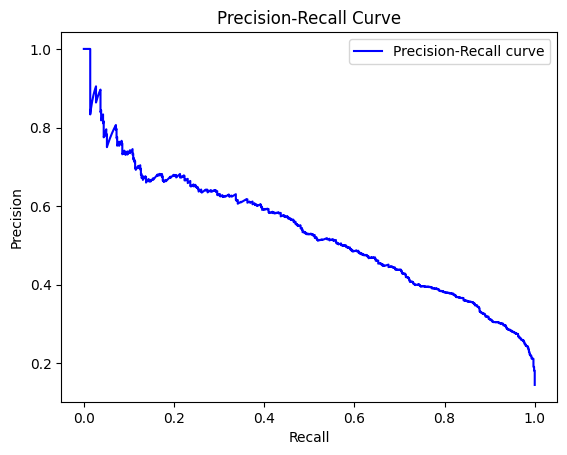

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

XLNet_model.eval()
y_probs, y_true = [], []
with torch.no_grad():
    for batch in val_dataloader:
        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device),
            'labels': batch['labels'].to(device),
        }
        outputs = XLNet_model(**inputs)
        val_loss += outputs.loss.item()

        logits = outputs.logits
        preds = torch.sigmoid(logits).cpu().numpy()
        y_probs.extend(preds)
        y_true.extend(inputs['labels'].cpu().numpy())

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

# Plot precision-recall curve
plt.plot(recall, precision, color='b', label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Compute F1 scores 
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])


### Checking the performance with different threshold values

In [20]:
test_dataset = TextDataset(test_df, tokenizer, max_length=128)
test_dataloader = DataLoader(test_dataset, batch_size=16)
XLNet_model.eval()
y_preds, y_true = [], []
with torch.no_grad():
        for batch in test_dataloader:
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }
            outputs = XLNet_model(**inputs)

            logits = outputs.logits
            preds = torch.sigmoid(logits).cpu().numpy() > 0.55 # testing threshold = 0.65 for now
            y_preds.extend(preds)
            y_true.extend(inputs['labels'].cpu().numpy())

In [21]:
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      4158
         1.0       0.58      0.52      0.55       694

    accuracy                           0.88      4852
   macro avg       0.75      0.73      0.74      4852
weighted avg       0.87      0.88      0.87      4852

